# DDPG Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='C:/Users/HP/Desktop/Reacher_Windows_x86_64/Reacher.exe')
# env = UnityEnvironment(file_name='../../Reacher_Linux/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Train the agent with ddpg

In [5]:
from collections import deque
import matplotlib.pyplot as plt
from ddpg_agent import Agent
import torch

%matplotlib inline

In [6]:
GOAL = 30.0 # Average Score for all the Agents
average = 0 # Average
maxTimeSteps = 1000 # Max time steps
episode = 0
# List of Size 100
scores_window = deque(maxlen=100)
# Scores of all agents in an episode
scores = np.zeros(num_agents)
# List to store Average score over all the agents in an episode
scores_episodes = []
# List to create 20 Agents
agents =[] 

# Define the Agents
for i in range(num_agents):
    agents.append(Agent(state_size, action_size, random_seed=0))
       
while average < GOAL:
    
    episode+=1
    # Reset the environment when episode is completed
    env_info = env.reset(train_mode=True)[brain_name]
    # Find the Initial State of the Environment
    states = env_info.vector_observations

    # Reset all the agents
    for agent in agents:
        agent.reset()

    # Make the Score board to zero
    scores = np.zeros(num_agents)
    
    t = 0
    while t < maxTimeSteps:
        
        t+=1
        # Get actions from all the agents and append them into 1
        actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])

        env_info = env.step(actions)[brain_name]        # send the action to the environment
        next_states = env_info.vector_observations     # get the next state
        rewards = env_info.rewards                     # get the reward
        dones = env_info.local_done        # Get the Result

        for i in range(num_agents):
            agents[i].step(t,states[i], actions[i], rewards[i], next_states[i], dones[i]) 

        states = next_states
        scores += rewards
        
        # Break if any agent reached the terminal state
        if np.any(dones):
            break 
            
    score = np.mean(scores) 
    scores_window.append(score)       # save most recent score
    scores_episodes.append(score) 
    average = np.mean(scores_window)
    
    if(episode % 50 == 0)
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(episode, score, average), end="\n")

    if average >=30.0:
        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(episode, score, average), end="\n")
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode, average))
        # Save the Agents
        torch.save(Agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(Agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        break


Initializing ReplayBuffer
Episode 50	Score: 19.51	Average Score: 15.3744
Episode 100	Score: 23.75	Average Score: 17.9824
Episode 150	Score: 30.94	Average Score: 23.4548
Episode 200	Score: 31.11	Average Score: 28.7679
Episode 216	Score: 31.65	Average Score: 30.0758

Environment solved in 216 episodes!	Average Score: 30.07


### 4. Plotting the Rewards

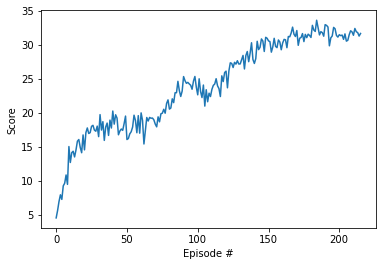

In [7]:
plt.plot(np.arange(len(scores_episodes)), scores_episodes)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Testing the Agent

In [8]:
from ddpg_model import Actor

scores = np.zeros(num_agents)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
random_seed=0
Agent.actor_local = Actor(state_size, action_size, random_seed).to(device)
Agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))

agents =[] 

for i in range(num_agents):
    agents.append(Agent(state_size, action_size, random_seed=0))

# Reset the Environment
env_info = env.reset(train_mode=False)[brain_name]
# Initial State
states = env_info.vector_observations 

while True:
    actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])

    env_info = env.step(actions)[brain_name]        # send the action to the environment
    next_states = env_info.vector_observations     # get the next state
    rewards = env_info.rewards
    dones = env_info.local_done        
    states = next_states
    scores += rewards
    print('\rScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
              .format(np.mean(scores), np.min(scores), np.max(scores)), end="") 
    if np.any(dones):
        break
        
print("\nScores: {}".format(scores))

Score: 32.87	min: 26.51	max: 37.87
Scores: [36.56999918 26.50999941 32.46999927 29.75999933 33.97999924 37.86999915
 29.77999933 30.41999932 33.57999925 35.47999921 34.02999924 36.46999918
 32.01999928 31.73999929 33.16999926 31.94999929 34.35999923 32.84999927
 31.78999929 32.55999927]
